# Create target values for weather

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

/Users/rick/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_dir = "/Volumes/Samsung_T5/lcrc_data"

In [3]:
weather_df = pd.read_csv(data_dir + "/weather_argonne_2020.csv")
weather_df = weather_df.iloc[:,1:]
weather_df.head()

,Day of the month,Month,Year,Mid averaging-period time,Pasquill stability class,Average 60 m wind direction (scalar) (units: deg),Average 60 m wind speed (scalar) (units: m/s),Standard deviation of 60 m wind direction (units: deg),Average 60 m temperature (units:deg C),Average 10 m wind direction (scalar) (units: deg),...,p_Average temperature difference/100m (units: deg C/100m),p_Total precipitation (units: mm),p_Average solar radiation (units: Watts/m**2),p_Average net radiation (units: Watts/m**2),p_Average barometric pressure (units: kPa),p_Average water vapor pressure (units: kPa),p_Average 10 cm soil temperature (units: deg C),p_Average 100 cm soil temperature (units: deg C),p_Average 10 ft soil temperature (units: deg C),p_date
0,23,1.0,20.0,130.0,D,184.4,6.1,8.8,-1.4,188.8,...,-0.7,0.0,0.0,-4.00,99.54,0.51,0.1,4.6,8.6,2020_01_23_02
1,23,1.0,20.0,330.0,D,173.2,5.0,9.3,-2.0,176.6,...,-0.8,0.4,0.0,-3.70,99.49,0.53,0.1,4.6,8.6,2020_01_23_04
2,23,1.0,20.0,430.0,D,172.7,4.9,10.5,-1.9,173.3,...,-0.7,0.0,0.0,-3.80,99.47,0.52,0.1,4.6,8.6,2020_01_23_05
3,23,1.0,20.0,530.0,D,172.9,4.9,9.0,-2.0,174.4,...,-0.8,0.0,0.0,-3.60,99.47,0.52,0.1,4.6,8.6,2020_01_23_06
4,23,1.0,20.0,630.0,D,170.8,4.1,8.9,-2.0,174.8,...,-0.8,0.2,3.2,-1.70,99.48,0.54,0.2,4.6,8.6,2020_01_23_07


In [4]:
col_to_float = ['Average 60 m wind direction (scalar) (units: deg)',
 'Average 60 m wind speed (scalar) (units: m/s)',
 'Standard deviation of 60 m wind direction (units: deg)',
 'Average 60 m temperature (units:deg C)',
 'Average 10 m wind direction (scalar) (units: deg)',
 'Average 10 m wind speed (scalar) (units: m/s)',
 'Standard deviation of 10 m wind direction (units: deg)',
 'Average 10 m temperature (units: deg C)',
 'Average dew point temperature (units: deg C)',
 'Average relative humidity (units: %)',
 'Average temperature difference/100m (units: deg C/100m)',
 'Total precipitation (units: mm)',
 'Average solar radiation (units: Watts/m**2)',
 'Average net radiation (units: Watts/m**2)',
 'Average barometric pressure (units: kPa)',
 'Average water vapor pressure (units: kPa)',
 'Average 10 cm soil temperature (units: deg C)',
 'Average 100 cm soil temperature (units: deg C)',
 'Average 10 ft soil temperature (units: deg C)',
 'p_Average 60 m wind direction (scalar) (units: deg)',
 'p_Average 60 m wind speed (scalar) (units: m/s)',
 'p_Standard deviation of 60 m wind direction (units: deg)',
 'p_Average 60 m temperature (units:deg C)',
 'p_Average 10 m wind direction (scalar) (units: deg)',
 'p_Average 10 m wind speed (scalar) (units: m/s)',
 'p_Standard deviation of 10 m wind direction (units: deg)',
 'p_Average 10 m temperature (units: deg C)',
 'p_Average dew point temperature (units: deg C)',
 'p_Average relative humidity (units: %)',
 'p_Average temperature difference/100m (units: deg C/100m)',
 'p_Total precipitation (units: mm)',
 'p_Average solar radiation (units: Watts/m**2)',
 'p_Average net radiation (units: Watts/m**2)',
 'p_Average barometric pressure (units: kPa)',
 'p_Average water vapor pressure (units: kPa)',
 'p_Average 10 cm soil temperature (units: deg C)',
 'p_Average 100 cm soil temperature (units: deg C)',
 'p_Average 10 ft soil temperature (units: deg C)']

In [5]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x


for i,col_name in enumerate(col_to_float):
    if weather_df[col_name].dtype == "object":
        weather_df[col_name] = weather_df[col_name].apply(remove_whitespace)
        weather_df[col_name] = pd.to_numeric(weather_df[col_name],errors='coerce')

In [6]:
weather_df.dtypes

Day of the month                                               int64
Month                                                        float64
Year                                                         float64
Mid averaging-period time                                    float64
Pasquill stability class                                      object
Average 60 m wind direction (scalar) (units: deg)            float64
Average 60 m wind speed (scalar) (units: m/s)                float64
Standard deviation of 60 m wind direction (units: deg)       float64
Average 60 m temperature (units:deg C)                       float64
Average 10 m wind direction (scalar) (units: deg)            float64
Average 10 m wind speed (scalar) (units: m/s)                float64
Standard deviation of 10 m wind direction (units: deg)       float64
Average 10 m temperature (units: deg C)                      float64
Average dew point temperature (units: deg C)                 float64
Average relative humidity (units: 

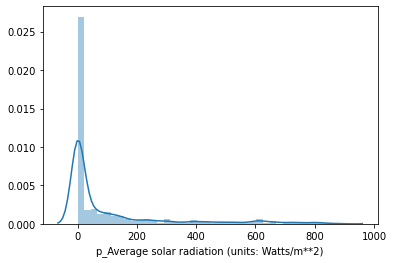

In [10]:
sns.distplot(weather_df['p_Average solar radiation (units: Watts/m**2)'])

In [17]:
solar_ranges = pd.qcut(weather_df['p_Average solar radiation (units: Watts/m**2)'], q=4,\
                      duplicates='drop')
solar_ranges.value_counts()

(-0.001, 0.3]     500
(111.6, 894.1]    247
(0.3, 111.6]      241
Name: p_Average solar radiation (units: Watts/m**2), dtype: int64

In [21]:
solar_values = weather_df['p_Average solar radiation (units: Watts/m**2)'].values
solar_labels = []
for i,val in enumerate(solar_values):
    if val < .3: solar_labels.append(0)
    elif val < 111.6: solar_labels.append(1)
    else: solar_labels.append(2)

(array([493.,   0.,   0.,   0.,   0., 248.,   0.,   0.,   0., 247.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

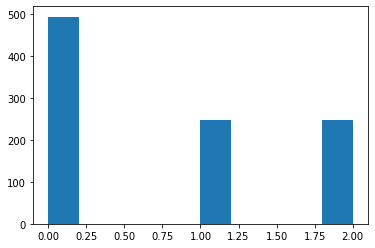

In [23]:
plt.hist(solar_labels)

In [24]:
weather_df["target"] = solar_labels

In [26]:
weather_df.to_csv("weather_argonne_target.csv")